# Tensorflow Tutorial

Before doing the coding assignemnt for unit8, you probably need to get yourself familiar with Tensorflow, a open source software library for numerial computation, particulary well suited and fine-tuned for large scale machine learning. The basic principle is you define your computation graph and the tensorflow will take the graph and run it efficiently on optimized c++ code.

## Download the tensorflow package

if you are using anaconda, you first get into your environment with:

```source activate env_name```

and then download the tensorflow

```conda install -c conda-forge tensorflow```

this command will install a cpu version in your machine.

if you are not using anaconda, you may want to run this to download tensorflow:

```pip install tensorflow```

which will install the lastest version tensorflow.

For this tutorial we are using python 3.6; tensorflow version 2.4.1

In [1]:
import sys
import tensorflow.compat.v1 as tf
import numpy as np
print(tf.__version__)
tf.disable_eager_execution()

2.16.1


## Creating And Running a Graph

![computation_graph](img/computation_graph.png)

Our first goal is to define a computation graph (computation_graph.png) in tensorflow and trigger the computation. Each node in the graph is called operation and each edge represents the flow of the data. The node can either operate on tensors (addition, subtraction, multiplication, etc) or generate a tensor (constant and variable). Each node takes zero or more tensors as inputs and produces a tensor as an output.

In [2]:
x = tf.Variable(3, name = "x") 
y = tf.Variable(4, name = "y")
two = tf.constant(2)  

op1 = tf.multiply(x, x)  
op2 = tf.multiply(x, op1)
op3 = tf.add(y, two)
op4 = tf.add(op2, op3)



In [9]:
x

array([0.03142919, 0.6364104 , 0.31435597, 0.5085707 , 0.9075665 ,
       0.24929222, 0.41038293, 0.75555116, 0.22879817, 0.07697991,
       0.28975144, 0.16122128, 0.92969763, 0.80812037, 0.6334038 ,
       0.8714606 , 0.8036721 , 0.18657006, 0.892559  , 0.5393422 ,
       0.80744016, 0.8960913 , 0.31800348, 0.11005192, 0.22793517,
       0.42710778, 0.81801474, 0.8607306 , 0.00695213, 0.5107473 ,
       0.417411  , 0.22210781, 0.11986537, 0.33761516, 0.9429097 ,
       0.32320294, 0.5187906 , 0.70301896, 0.3636296 , 0.9717821 ,
       0.9624473 , 0.2517823 , 0.4972485 , 0.30087832, 0.2848405 ,
       0.03688695, 0.6095643 , 0.50267905, 0.05147875, 0.27864647,
       0.9082659 , 0.23956189, 0.14489487, 0.48945275, 0.9856505 ,
       0.24205527, 0.67213553, 0.7616196 , 0.23763755, 0.72821635,
       0.36778313, 0.6323058 , 0.6335297 , 0.5357747 , 0.09028977,
       0.8353025 , 0.32078007, 0.1865185 , 0.04077514, 0.590893  ,
       0.6775644 , 0.01658783, 0.51209307, 0.22649577, 0.64517

Your operation will be built on a default graph since you didn't specify tf.Graph() which we will talk about later.

Once you define your operation, you can start a session and execute your graph.  

In [3]:
with tf.Session() as sess: # starts session, now we can evaluate
    x.initializer.run() # Inits vals for x to 3
    y.initializer.run()
    result = op4.eval() # evaluates op 4

2024-03-24 10:47:05.493041: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


You initialize the variable in the graph and and trigger the computation by evaluating the last operation.  Since the op4 is dependent on op2 and op3, it will recursively call evaluation on op2 and op3 until it reaches the leaf node which is the variable and constant defined.

## Managing the Graph 

In [5]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [6]:
reset_graph()

You can create your own graphs and run them in sessions


In [7]:
graph1 = tf.Graph()

with graph1.as_default():
    x = np.random.rand(100).astype(np.float32)
    target = x * 0.3 - 0.23
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
    b = tf.Variable(tf.zeros([1]))
    pred = W * x + b
    loss = tf.reduce_mean(tf.square(target - pred))
    print('num of trainable variables = %d' % len(tf.trainable_variables()))
    print('num of global variables = %d' % len(tf.global_variables()))
    print('graph1=', graph1)
    print('get default graph in current session = ', tf.get_default_graph())
    
print("*"*100)
print('num of trainable variables = %d' % len(tf.trainable_variables()))
print('num of global variables = %d' % len(tf.global_variables()))
print('global default graph = ' , tf.get_default_graph())
print('get default graph in current session = ', tf.get_default_graph())

graph2 = tf.Graph()
with graph2.as_default():
    x = np.random.rand(100).astype(np.float32)
    target = x * 0.4 - 0.73
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
    b = tf.Variable(tf.zeros([1]))
    pred = W * x + b
    loss = tf.reduce_mean(tf.square(target - pred))
    print("*"*100)
    print('num of trainable variables = %d' % len(tf.trainable_variables()))
    print('num of global variables = %d' % len(tf.global_variables()))
    print('graph2 = ', graph2)
    print('get default graph in current session = ', tf.get_default_graph())


num of trainable variables = 2
num of global variables = 2
graph1= <tensorflow.python.framework.ops.Graph object at 0x2856144c0>
get default graph in current session =  <tensorflow.python.framework.ops.Graph object at 0x2856144c0>
****************************************************************************************************
num of trainable variables = 0
num of global variables = 0
global default graph =  <tensorflow.python.framework.ops.Graph object at 0x285614340>
get default graph in current session =  <tensorflow.python.framework.ops.Graph object at 0x285614340>
****************************************************************************************************
num of trainable variables = 2
num of global variables = 2
graph2 =  <tensorflow.python.framework.ops.Graph object at 0x16d2194c0>
get default graph in current session =  <tensorflow.python.framework.ops.Graph object at 0x16d2194c0>


## Practice Create Graph with Tensorflow

Now it's your turn to practice to define a computation graph in tensorflow (cross_entropy.png). (NOTE : use placeholder to define variable instead of tf.Variable)

![cross_entropy](img/cross_entropy.png)

In [13]:
# TODO :: define the cross entorpy computation graph in tensorflow; expect 10-15 lines of code (Requirement : create your own graph with tf.Graph an run your graph; 
# use placeholder to define variable instead of tf.Variable)
reset_graph()
cross_entropy_graph = tf.Graph()
n_inputs = 5
n_outputs = 1

with cross_entropy_graph.as_default():
    # Define placeholders
    x = tf.placeholder(tf.float32, shape=(None, n_inputs), name="x")  # Assuming n_inputs is defined
    y_true = tf.placeholder(tf.int64, shape=(None), name="y_true")  # Assuming y_true is a vector of class indices

    # Create model variables
    W = tf.Variable(tf.random.uniform([n_inputs, n_outputs], -1.0, 1.0), name="weights")  # Assuming n_outputs is defined
    b = tf.Variable(tf.zeros([n_outputs]), name="biases")
    
    # Step 4: Build the model
    logits = tf.matmul(x, W) + b
    
    # Step 5: Define the loss (cross-entropy)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
    loss = tf.reduce_mean(cross_entropy, name="loss")
    
    # Optional: Define the optimizer and training operation
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)  # Assuming a learning rate is defined
    training_op = optimizer.minimize(loss)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

# Now you can run this graph in a session
with tf.Session(graph=cross_entropy_graph) as sess:
    sess.run(init)

## Linear Regression

### Using the Normal Equation

In [14]:
import numpy as np
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)

# TODO :: write down the normal equation, for more detail of the normal equation, you can refer to http://mlwiki.org/index.php/Normal_Equation 
# hint : you may want to use tf.matrix_inverse, tf.matrix_inverse and tf.matmul
# Normal Equation
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()

In [15]:
theta_value

array([[-3.7086937e+01],
       [ 4.3637305e-01],
       [ 9.4115436e-03],
       [-1.0702482e-01],
       [ 6.4428186e-01],
       [-4.0383993e-06],
       [-3.7829489e-03],
       [-4.2279035e-01],
       [-4.3615198e-01]], dtype=float32)

In [16]:
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
# TODO :: implement the same normal equation with numpy
# hint : you may want to use np.linalg.inv
# Implementing the Normal Equation
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


print(theta_numpy)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


Compare with Scikit-Learn

In [19]:
from sklearn.linear_model import LinearRegression
# TODO :: define the linear regression model and fit the training data. the model name should be lin_reg
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target)

print('Theta:', [lin_reg.intercept_], lin_reg.coef_)

Theta: [-36.941920207184246] [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


## Using Batch Gradient Descent

Gradient Descent requires scaling the feature vectors first. We could do this using TF, but let's just use Scikit-Learn for now.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [21]:

print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


In [22]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.71450037
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555718
Epoch 400 MSE = 0.54881126
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.5340677
Epoch 900 MSE = 0.53214735


In [23]:
best_theta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393812],
       [-0.04269556],
       [-0.6614528 ],
       [-0.63752776]], dtype=float32)

## Using a GradientDescentOptimizer

In [24]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [25]:
# TODO :: define the GradientDescentOptimizer and call minimize on the optimizer, the result should be named as training_op; you can refer to the tf documentation : https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/GradientDescentOptimizer
# Define the GradientDescentOptimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Create the training operation
training_op = optimizer.minimize(mse)

# Initialize global variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.71450037
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555718
Epoch 400 MSE = 0.54881126
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.5340677
Epoch 900 MSE = 0.5321473


In [26]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.71450037
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555718
Epoch 400 MSE = 0.54881126
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.5340677
Epoch 900 MSE = 0.5321473
Best theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.3477088 ]
 [ 0.36178365]
 [ 0.00393811]
 [-0.04269556]
 [-0.66145283]
 [-0.63752776]]


In [28]:
# TODO :: repeat the same procedure this time use the MomentumOptimizer, you can refer to the tensorflow documentation : https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/MomentumOptimizer
# MomentumOptimizer
momentum = 0.9
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=momentum)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        sess.run(training_op)
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
    
    best_theta = theta.eval()


Epoch 0 MSE = 8.805304
Epoch 100 MSE = 0.5303791
Epoch 200 MSE = 0.52499706
Epoch 300 MSE = 0.5244089
Epoch 400 MSE = 0.5243327
Epoch 500 MSE = 0.52432257
Epoch 600 MSE = 0.5243212
Epoch 700 MSE = 0.524321
Epoch 800 MSE = 0.524321
Epoch 900 MSE = 0.52432096


## Saving and restoring a model 



In [55]:
reset_graph()

n_epochs = 1000                                                                       
learning_rate = 0.01                                                                  

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                     
error = y_pred - y                                                                   
mse = tf.reduce_mean(tf.square(error), name="mse")                                    
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            
training_op = optimizer.minimize(mse)                                                 

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())                                
            save_path = saver.save(sess, "my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "my_model_final.ckpt")

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.71450037
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555718
Epoch 400 MSE = 0.54881126
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.5340677
Epoch 900 MSE = 0.5321473


In [56]:
best_theta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401658],
       [-0.3477088 ],
       [ 0.36178365],
       [ 0.00393811],
       [-0.04269556],
       [-0.66145283],
       [-0.63752776]], dtype=float32)

In [58]:

with tf.Session() as sess:
    saver.restore(sess, "my_model_final.ckpt")
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from my_model_final.ckpt


In [59]:
np.allclose(best_theta, best_theta_restored)

True

Note: By default the saver also saves the graph structure itself in a second file with the extension .meta. You can use the function tf.train.import_meta_graph() to restore the graph structure. This function loads the graph into the default graph and returns a Saver that can then be used to restore the graph state (i.e., the variable values).

## Using TensorBoard


In [60]:
import tensorboard
print(tensorboard.__version__)

2.16.2


In [62]:
# Load the TensorBoard notebook extension.
%reload_ext tensorboard

In [63]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(tf.float32, name = "x")
    W1 = tf.placeholder(tf.float32, name = "W1")
    b1 = tf.placeholder(tf.float32, name = "b1")
    
    a1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
    W2 = tf.placeholder(tf.float32, name = "W2")
    b2 = tf.placeholder(tf.float32, name = "b2")
    
    a2 = tf.nn.relu(tf.matmul(a1, W2) + b2)
    
    W3 = tf.placeholder(tf.float32, name = "W3")
    b3 = tf.placeholder(tf.float32, name = "b3")
    
    y_hat = tf.matmul(a2, W3) + b3
    
# tf.summary.FileWriter("logs", g).close()
tf.summary.FileWriter(logdir="logs/", graph=g)

In [64]:
tf.print(g, output_stream=sys.stdout)

<tf.Operation 'PrintV2' type=PrintV2>

In [65]:
import os 
path = os.path.abspath(os.getcwd())

In [67]:
logs_path = path + "/logs"
print(logs_path)

/Users/christianruiz/Desktop/github/comp-642/module8/HW8_Provided/logs


In [71]:
# Activates the tensorboard UI to visualize the graph g
# !kill 28887
%reload_ext tensorboard
%tensorboard --logdir logs_path

If the commands above are not working, open a new terminal and run the command tensorboard --logdir "Your logs_path output." Then follow the terminal instructions to view the tensorboard visualization. 

using the command in the terminal and received this output:

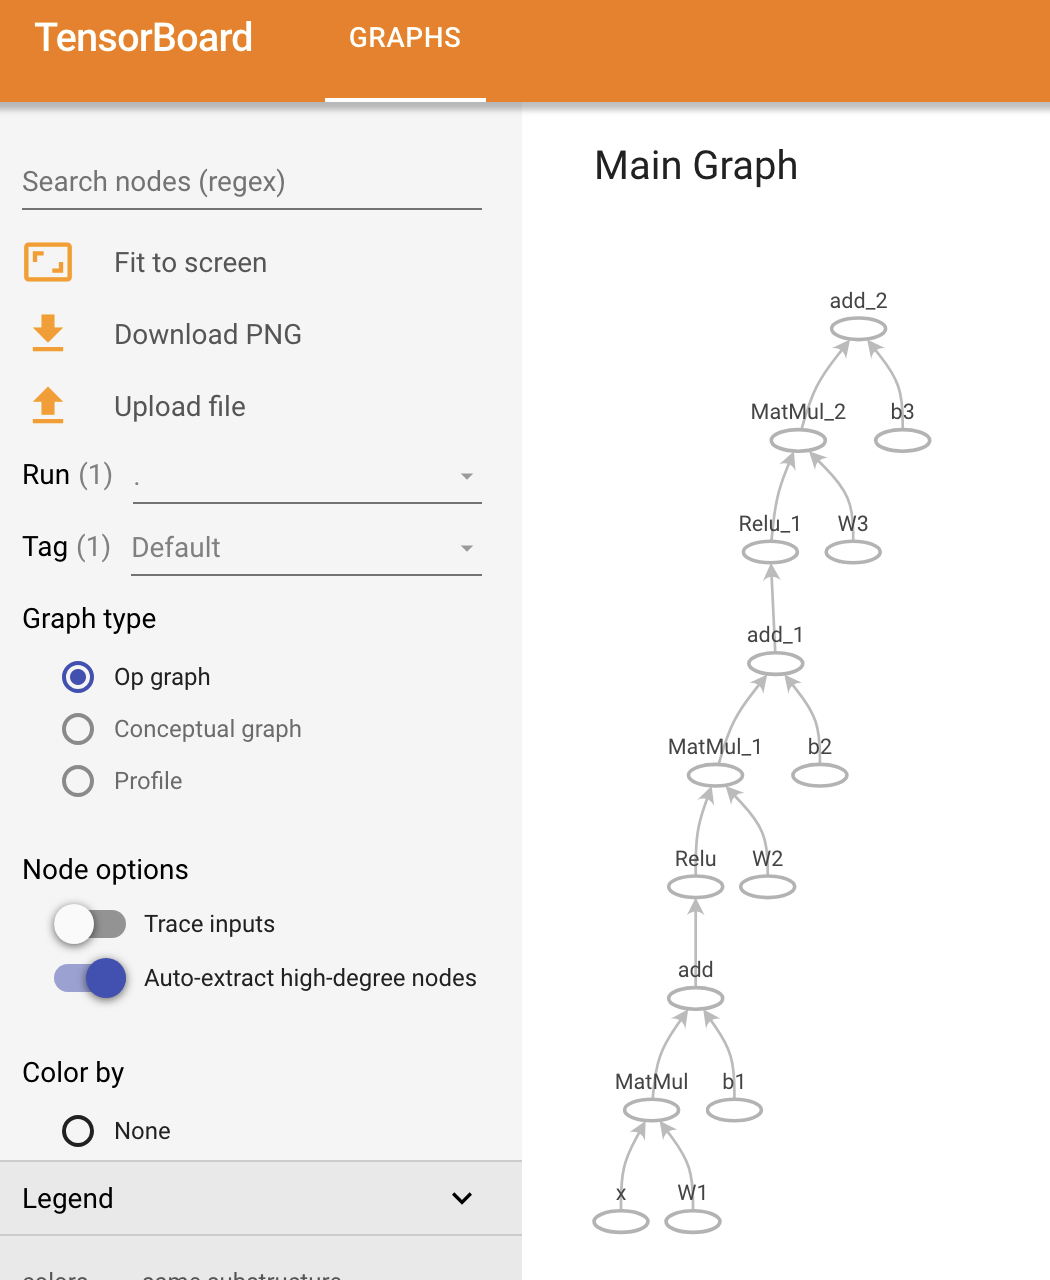
